# Main factors that influence the WORK_LIFE_BALANCE_SCORE (WLB) of employees.

To find out this information, let's analyze the dataset and see which factors have the most influence on the WLB score of employees.

## Import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Import dataset

The next step is to import our dataset in a csv format which is called FAU_Bank_Employee_Wellbeing.csv


In [2]:
df = pd.read_csv("FAU_Bank_Employee_Wellbeing.csv", sep=",")

## Data cleaning

    • Check for missing values
    
    • drop columns - for now drop the Employee_ID column as it does not influence the WORK_LIFE_BALANCE_SCORE (WLB) of employees

In [3]:
df.isnull().values.any()

True

The function returns true so we need to remove the null values and check it again. For that we use the "dropna" function.

In [4]:
df=df.dropna(axis=0, how='any')
df.isnull().values.any()

False

In [5]:
df = df.drop(['Employee_ID'], axis=1)

## Data transformation

#### Convert Job role, age and Gender to numerical values - using sklearn LabelEncoder


In [6]:
label_encodings = {}
columns = ["AGE", "JOB_ROLE", "GENDER"]
for column in columns:
    label = LabelEncoder()
    df[column] = label.fit_transform(df[column])
    label_encodings[column] = {index: label for index, label in enumerate(label.classes_)}

print(label_encodings)

{'AGE': {0: '21 to 35', 1: '36 to 50', 2: '51 or more', 3: 'Less than 20'}, 'JOB_ROLE': {0: 'Bank Teller', 1: 'Business Analyst', 2: 'Credit Analyst', 3: 'Customer Service', 4: 'Finance Analyst', 5: 'Human Resources', 6: 'Investment Banker', 7: 'Loan Processor', 8: 'Mortgage Consultant', 9: 'Risk Analyst'}, 'GENDER': {0: 'Female', 1: 'Male'}}


In [7]:
df.isnull().values.any()

False

In [8]:
df.head()

,JOB_ROLE,DAILY_STRESS,WORK_TRAVELS,TEAM_SIZE,DAYS_ABSENT,WEEKLY_EXTRA_HOURS,ACHIEVED_BIG_PROJECTS,EXTRA_HOLIDAYS,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS_IN_THOUSAND,SLEEP_HOURS,LOST_VACATION,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,1,2.0,2,5,0,5,2,0,1,6,5,7,5,1,4,0,1,0,609.5
1,0,3.0,4,3,8,10,5,2,2,5,5,8,2,2,3,2,1,0,655.6
2,7,3.0,3,4,4,10,3,2,2,2,4,8,10,2,4,8,1,0,631.6
3,1,3.0,10,3,10,7,2,5,2,3,5,5,7,1,5,2,2,0,622.7
4,6,1.0,3,3,10,4,2,4,2,5,5,7,0,2,8,1,2,0,663.9


Now the data is ready for further analysis.

## Data Visualization

### Bar chart of employee daily stress by gender


C:\Users\prabh\AppData\Local\Temp\ipykernel_18056\1353045539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


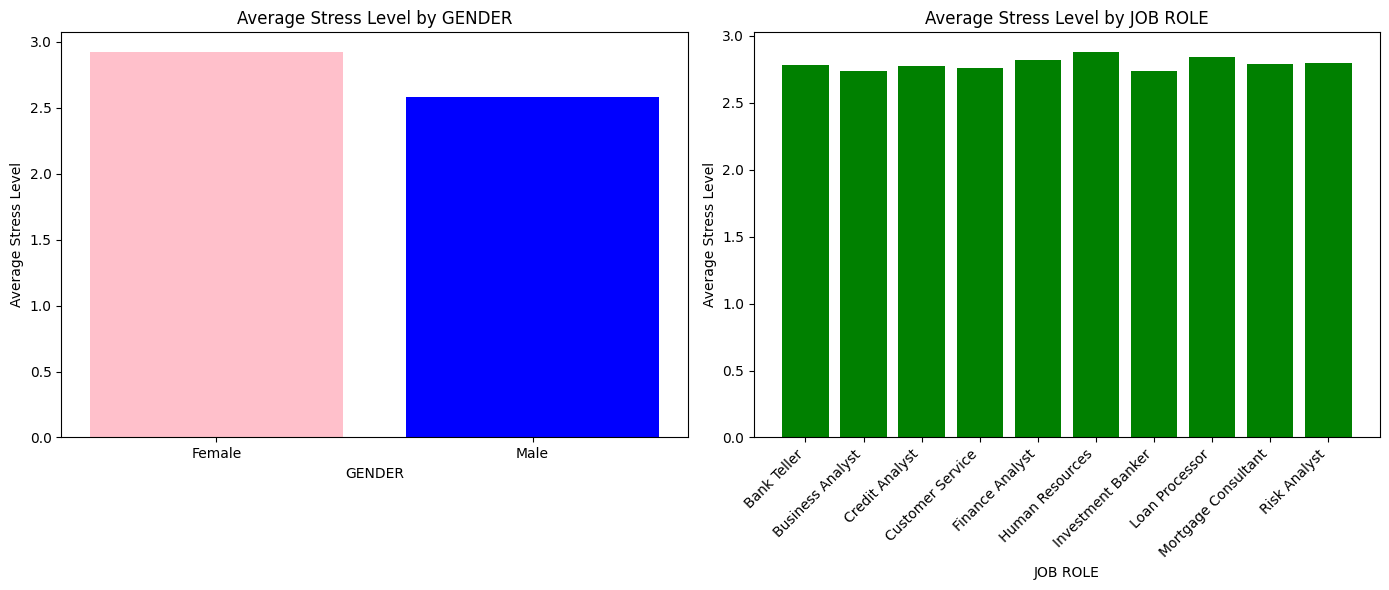

In [9]:
from matplotlib import pyplot as plt

# Plotting the bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
# Bar chart for stress level by gender
df_gender = df.groupby('GENDER')['DAILY_STRESS'].mean().reset_index()
df_gender['GENDER'] = df_gender['GENDER'].map(label_encodings['GENDER'])
axes[0].bar(df_gender['GENDER'], df_gender['DAILY_STRESS'], color=['pink', 'blue'])
axes[0].set_title('Average Stress Level by GENDER')
axes[0].set_xlabel('GENDER')
axes[0].set_ylabel('Average Stress Level')

# Bar chart for stress level by job role
df_job_role = df.groupby('JOB_ROLE')['DAILY_STRESS'].mean().reset_index()
df_job_role['JOB_ROLE'] = df_job_role['JOB_ROLE'].map(label_encodings['JOB_ROLE'])
plt.bar(df_job_role['JOB_ROLE'], df_job_role['DAILY_STRESS'], color='green')
axes[1].set_title('Average Stress Level by JOB ROLE')
axes[1].set_xlabel('JOB ROLE')
axes[1].set_ylabel('Average Stress Level')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



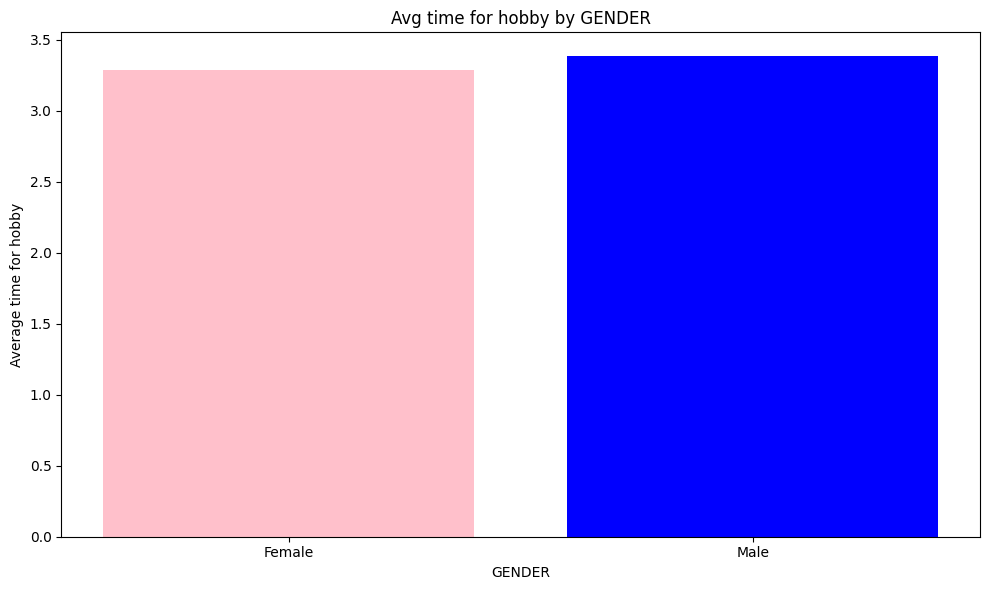

In [10]:
# similar plot for hobbies and gender would give us a better understanding of who dedicates more time to their hobbies, men or women?

# Plotting the bar charts
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
# Bar chart for stress level by gender
df_gender = df.groupby('GENDER')['TIME_FOR_HOBBY'].mean().reset_index()
df_gender['GENDER'] = df_gender['GENDER'].map(label_encodings['GENDER'])
axes.bar(df_gender['GENDER'], df_gender['TIME_FOR_HOBBY'], color=['pink', 'blue'])
axes.set_title('Avg time for hobby by GENDER')
axes.set_xlabel('GENDER')
axes.set_ylabel('Average time for hobby')

plt.tight_layout()
plt.show()

From the bar chart, we can see that the avg time for hobby for male is higher than females.
For males it is close to 3.384527314 and for females it is 3.290626902

## Heatmap of correlation matrix


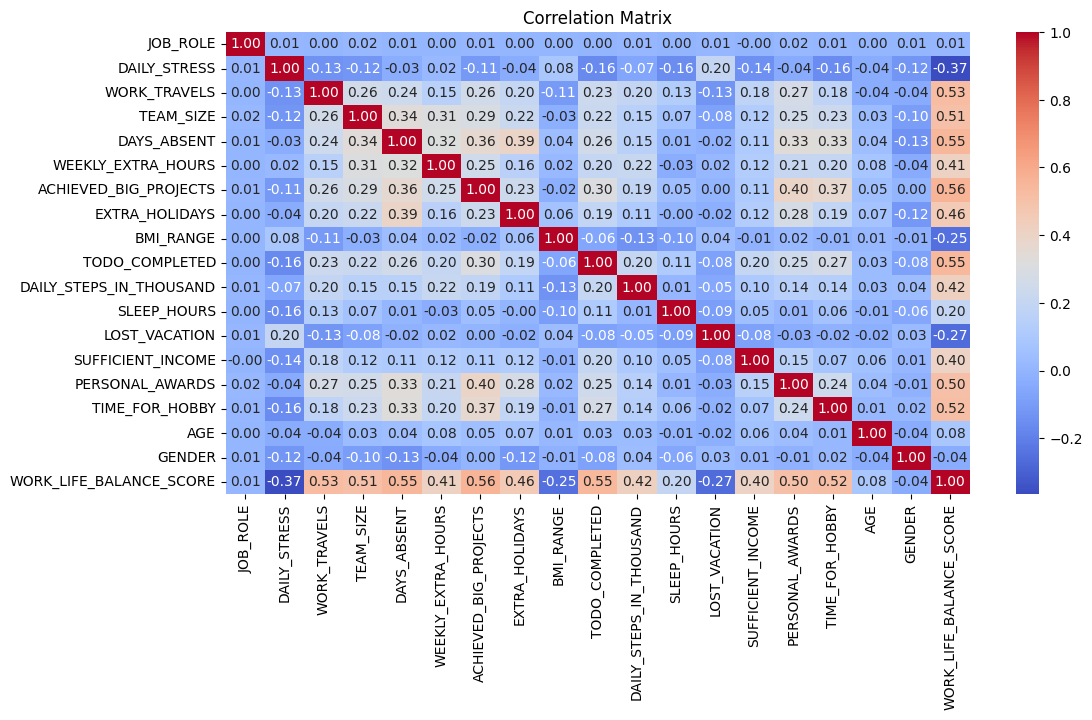

In [11]:
# heat map of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Train the model using Linear Regression

#### Define the dependent and independent variables


In [12]:
x = df.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)
y = df['WORK_LIFE_BALANCE_SCORE']

#### Split the data into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#### Train the model

In [14]:
from sklearn.linear_model import LinearRegression 
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

#### Predict the WLB score

In [15]:
y_pred = ml.predict(x_test)
predicted_value = ml.predict([[0,2,2,5,0,5,2,0,1,6,5,7,5,1,4,0,1,0]])
actual_value = df.loc[1,'WORK_LIFE_BALANCE_SCORE']

print(predicted_value, actual_value)

[610.38366599] 655.6


c:\Users\prabh\FAU\Study\SoSe2024\PA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Evaluate the model

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9449331698659169

In [17]:
# a tabular form the difference between the real value found in the dataset and the predicted value by the trained model

df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results['Difference'] = df_results['Actual'] - df_results['Predicted']
df_results.head()

,Actual,Predicted,Difference
5476,632.6,627.244123,5.355877
4507,652.0,659.840253,-7.840253
8812,647.5,655.455634,-7.955634
11151,622.3,639.515359,-17.215359
5242,780.4,773.786772,6.613228


#### Summary

In [18]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary2())

                            Results: Ordinary least squares
Model:                  OLS                     Adj. R-squared (uncentered): 0.992      
Dependent Variable:     WORK_LIFE_BALANCE_SCORE AIC:                         176076.2669
Date:                   2024-07-11 14:06        BIC:                         176214.4804
No. Observations:       15971                   Log-Likelihood:              -88020.    
Df Model:               18                      F-statistic:                 1.095e+05  
Df Residuals:           15953                   Prob (F-statistic):          0.00       
R-squared (uncentered): 0.992                   Scale:                       3589.4     
-------------------------------------------------------------------------------------------
                             Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-------------------------------------------------------------------------------------------
JOB_ROLE                     3.1056      

#### Predict the WLB score for a new employee

In [19]:
# predicting the work life balance score for a new employee

predicted_value = ml.predict([[0, 2, 3, 4, 5, 7, 2, 2, 2, 3, 5, 7, 5, 2, 4, 2, 0, 1]])
print(predicted_value)

[630.3839036]


c:\Users\prabh\FAU\Study\SoSe2024\PA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
